In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml

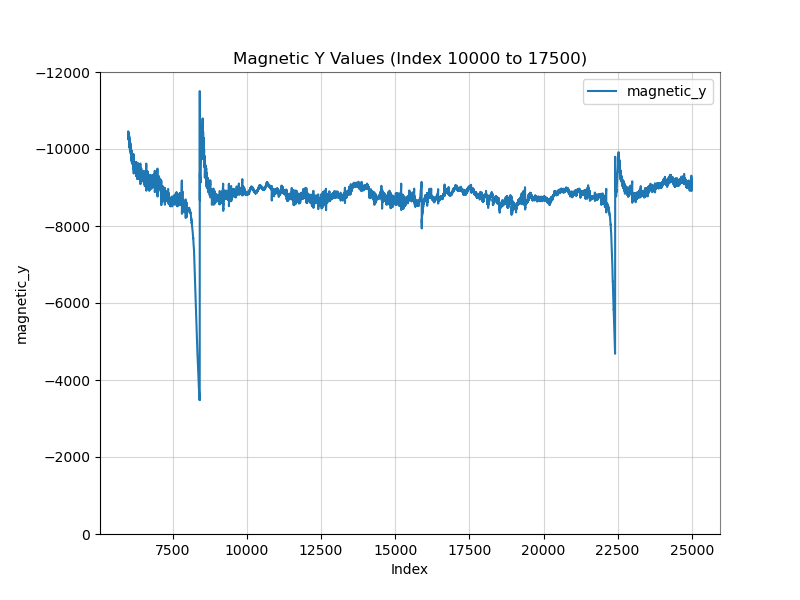

In [2]:
%matplotlib widget

# Load the YAML file
file_path = 'DeflectionMeasurementLog.txt'

# # Load all documents from the YAML file
# yaml_data = []
# with open(file_path, 'r') as file:
#     for data in yaml.safe_load_all(file):
#         yaml_data.append(data)

# # Filter out None documents
# filtered_yaml_data = [doc for doc in yaml_data if doc is not None]

# # Extract the 'magnetic_y' values
# magnetic_y_values = [doc['magnetic_y'] for doc in filtered_yaml_data if 'magnetic_y' in doc]

data_corrected = pd.read_csv(file_path, header=None)

# Define the range of interest
start_index = 6000
end_index = 25000

# Plot the magnetic_y values within the specified range
plt.figure(figsize=(8, 6))
plt.plot(range(start_index, end_index), data_corrected[1][start_index:end_index], label='magnetic_y')
plt.title('Magnetic Y Values (Index 10000 to 17500)')
plt.xlabel('Index')
plt.ylabel('magnetic_y')
plt.ylim(0, -12000)
plt.legend()
plt.grid(True)

# Set the transparency of the grid lines
grid_alpha = 0.5  # 50% transparency for grid
plt.grid(True, alpha=grid_alpha)

# Get current axis and set transparency for upper and right spines
ax = plt.gca()  # Get current axis
ax.spines['top'].set_alpha(grid_alpha)
ax.spines['right'].set_alpha(grid_alpha)

plt.show()


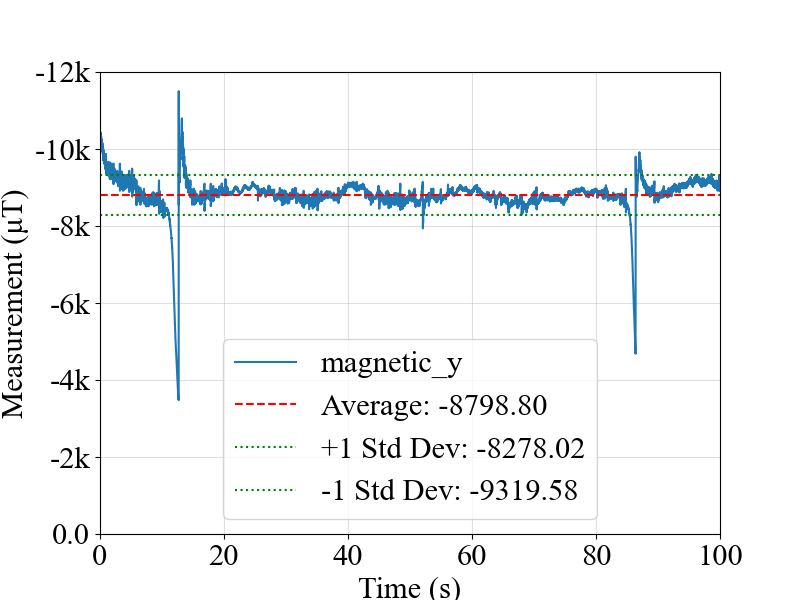

In [5]:
plt.rcParams['font.family'] = 'Times New Roman'

# Define the range of interest
start_index = 6000
end_index = 25000

# Extract the subset of magnetic_y values within the specified range
subset_magnetic_y_values = data_corrected[1][start_index:end_index]

# Calculate the average and standard deviation for this range
average_value = np.mean(subset_magnetic_y_values)
std_deviation = np.std(subset_magnetic_y_values)

# Plot the magnetic_y values within the specified range
plt.figure(figsize=(8, 6))
plt.plot(range(start_index, end_index), subset_magnetic_y_values, label='magnetic_y')

# Plot the average value line
plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average: {average_value:.2f}')

# Plot the standard deviation lines
plt.axhline(y=average_value + std_deviation, color='g', linestyle=':', label=f'+1 Std Dev: {average_value + std_deviation:.2f}')
plt.axhline(y=average_value - std_deviation, color='g', linestyle=':', label=f'-1 Std Dev: {average_value - std_deviation:.2f}')

# Set the y-limits
x_lim = (start_index, end_index)
y_lim = (0, -12000)
plt.xlim(x_lim)
plt.ylim(y_lim)

# Set custom tick locations to reduce density
x_ticks = np.linspace(x_lim[0], x_lim[1], 6)  # 5 evenly spaced ticks on x-axis
y_ticks = np.linspace(y_lim[0], y_lim[1], 7)  # 5 evenly spaced ticks on y-axis
plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Custom labels (replace these with your desired labels)
x_labels = ['0', '20', '40', '60', '80', '100']
y_labels = ['0.0', '-2k', '-4k', '-6k', '-8k', '-10k', '-12k']

# Set the custom tick locations and labels
plt.xticks(x_ticks, x_labels, fontsize=22)
plt.yticks(y_ticks, y_labels, fontsize=22)

# Add labels and title
# plt.title('Magnetic Y Values (Index 10000 to 17500) with Average and Std Dev')
plt.xlabel('Time (s)', fontsize=22)
plt.ylabel('Measurement (μT)', fontsize=22)
plt.legend(fontsize=22)
plt.grid(True)

# Set the transparency of the grid lines
grid_alpha = 0.4  # 50% transparency for grid
plt.grid(True, alpha=grid_alpha)

# Get current axis and set transparency for upper and right spines
grid_alpha = 1.0
ax = plt.gca()  # Get current axis
ax.spines['top'].set_alpha(grid_alpha)
ax.spines['right'].set_alpha(grid_alpha)

plt.show()
